# Download Music Imagery Dataset
The imagery dataset can be downloaded from dryad or from the CNSP workshop's resources:
https://cnspworkshop.net/resources.html

The dataset is the same, but the formatting between dryad and CNSP is different.
The CNSP dataset is formatted as continuous-event Neural Data data format (and should include a channel map?)

In [5]:
if 0: # set to 1 to attempt downloading the dataset from CNSP server (may not work on-campus)
    !wget https://www.data.cnspworkshop.net/data/datasetCND_musicImagery.zip -O data/datasetCND_musicImagery.zip

If the above link is unreachable (possibly on school network), grab a clone hosted on google drive:

(code from https://linux.tips/tutorials/download-large-google-drive-files-with-wget-in-terminal)

In [6]:
if 0: # set to 1 to attempt downloading the dataset from google drive clone
    !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1PgsWiJ3kQsjvV2TcvM2gC_uWI_o6ecp4' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1PgsWiJ3kQsjvV2TcvM2gC_uWI_o6ecp4" -O datasetCND_musicImagery.zip && rm -rf /tmp/cookies.txt

This saves the file to the repo's root directory.
We could make a data folder and unzip the data there:

In [8]:
if 0:
    !mkdir data
    !mv datasetCND_musicImagery.zip data/
    !unzip data/datasetCND_musicImagery.zip -d data

mkdir: cannot create directory ‘data’: File exists
mv: cannot stat 'datasetCND_musicImagery.zip': No such file or directory


Make a list of all the files in the dataset:

In [13]:
from glob import glob
datafiles = glob('data/musicImagery/**', recursive=True)
for filename in datafiles:
    print(filename)

data/musicImagery/
data/musicImagery/dataCND
data/musicImagery/dataCND/dataSub18.mat
data/musicImagery/dataCND/dataSub11.mat
data/musicImagery/dataCND/dataSub16.mat
data/musicImagery/dataCND/dataSub9.mat
data/musicImagery/dataCND/dataSub7.mat
data/musicImagery/dataCND/dataSub6.mat
data/musicImagery/dataCND/dataSub1.mat
data/musicImagery/dataCND/dataSub8.mat
data/musicImagery/dataCND/dataSub17.mat
data/musicImagery/dataCND/dataSub10.mat
data/musicImagery/dataCND/dataSub19.mat
data/musicImagery/dataCND/dataSub2.mat
data/musicImagery/dataCND/dataSub5.mat
data/musicImagery/dataCND/dataSub21.mat
data/musicImagery/dataCND/dataSub13.mat
data/musicImagery/dataCND/dataSub14.mat
data/musicImagery/dataCND/dataSub15.mat
data/musicImagery/dataCND/dataSub12.mat
data/musicImagery/dataCND/dataStim.mat
data/musicImagery/dataCND/dataSub20.mat
data/musicImagery/dataCND/dataSub4.mat
data/musicImagery/dataCND/dataSub3.mat
data/musicImagery/LICENSE
data/musicImagery/readme.txt
data/musicImagery/stimuli
data

# Import the input stimulus

In [14]:
from scipy.io import loadmat
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html

import matplotlib.pyplot as plt
import numpy as np

In [68]:
stim_mat = loadmat(r"data/musicImagery/dataCND/dataStim.mat", 
                   simplify_cells = True, # trying this as the struct here is complicated
                   squeeze_me = True
                  ) 
stim = stim_mat['stim']
print(stim.keys())
# How do we read stim? Its an empty-shaped array...

dict_keys(['stimIdxs', 'condIdxs', 'condNames', 'data', 'names', 'fs'])


## Print shapes of all stim array entries

In [72]:
stimIdxs = stim['stimIdxs']
print(f'stimIdxs shape: {stimIdxs.shape}')

condIdxs = stim['condIdxs']
print(f'condIdxs shape: {condIdxs.shape}')

condNames = stim['condNames']
print(f'condNames shape: {condNames.shape}')

data = stim['data']
print(f'data shape: {data.shape}')

names = stim['names']
print(f'names shape: {names.shape}')

fs = stim['fs']
print(f'fs: {fs}')

stimIdxs shape: (88,)
condIdxs shape: (88,)
condNames shape: (2,)
data shape: (2, 88)
names shape: (2,)
fs: 64


## Print stim entries themselves

In [136]:
print(stimIdxs)
print(condIdxs)
print(condNames)
print(names)

[1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 4]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['Listening' 'Imagery']
['Acoustic Envelope' 'Expectation Vector']


## Identify unique conditions (2) and songs (4)

In [100]:
condList = np.unique(condIdxs)
print(f'Unique Conditions: {condList}')

songList = np.unique(stimIdxs)
print(f'Unique Songs: {songList}')

Unique Conditions: [1 2]
Unique Songs: [1 2 3 4]


## Collect data idxs by condition and song

In [112]:
idxs = {} # dict to store idxs for each condition and stim/song idx

for cond in condList: # two conditions
    condName = condNames[cond-1] # MATLAB indexes from 1...
    idxs[condName] = {}
    
    for song in songList:
        
        print(f'{condNames[cond-1]}: Song {song}') 
        matched_ndx = np.where(
            (stimIdxs == song) & (condIdxs == cond)
            )[0]
        print(matched_ndx)
        
        idxs[condName][song] = matched_ndx

Listening: Song 1
[ 0  1  2  3  4  5  6  7  8  9 10]
Listening: Song 2
[11 12 13 14 15 16 17 18 19 20 21]
Listening: Song 3
[22 23 24 25 26 27 28 29 30 31 32]
Listening: Song 4
[33 34 35 36 37 38 39 40 41 42 43]
Imagery: Song 1
[44 45 46 47 48 49 50 51 52 53 54]
Imagery: Song 2
[55 56 57 58 59 60 61 62 63 64 65]
Imagery: Song 3
[66 67 68 69 70 71 72 73 74 75 76]
Imagery: Song 4
[77 78 79 80 81 82 83 84 85 86 87]


## Plot acustic envelope and expectations for one song

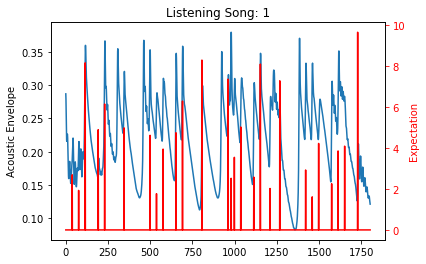

In [135]:
cond = 'Listening'
song = 1
envs = data[0][idxs[cond][song]]
exps = data[1][idxs[cond][song]]

fig, ax_env = plt.subplots()
ax_env.plot(envs[0])
ax_env.set_ylabel('Acoustic Envelope')

ax_exp = ax_env.twinx()
ax_exp.plot(exps[0], 'r')
ax_exp.tick_params(axis='y', colors='red')
ax_exp.yaxis.label.set_color('r')
ax_exp.set_ylabel('Expectation')

plt.xlabel('Time [ms]')
plt.title(f'{cond} Song: {song}')
plt.show()